## Exploration of NYPL Dataset
### CS513 - Data Cleansing project

#### First look at data using Jupyter notebook
Date: 2020-06-29
Data: Using NYPL Dataset published on 2020-06-16

The dataset contains a mix of simple bibliographic description of the menus (created by The New York Public Library) and the culinary and economic content of the menus themselves.

There are following four files:
* Dish.csv
* Menu.csv
* MenuItem.csv
* MenuPage.csv

## Explore

Import with Pandas

Set pandas default number precision for floats to 2 decimal places

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### File Names

In [2]:
DataDir = 'Data/'
DishFile = 'Dish.csv'
MenuFile = 'Menu.csv'
ItemFile = 'MenuItem.csv'
PageFile = 'MenuPage.csv'

#### Explore Dishes

In [3]:
with open (DataDir+DishFile, 'r', encoding='utf-8') as f:
    df_dish = pd.read_csv(f)
df_dish.head(10)

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,nan,8,8,1897,1927,0.20,0.40
1,2,Chicken gumbo,nan,111,117,1895,1960,0.10,0.80
2,3,Tomato aux croutons,nan,14,14,1893,1917,0.25,0.40
3,4,Onion au gratin,nan,41,41,1900,1971,0.25,1.00
4,5,St. Emilion,nan,66,68,1881,1981,0.00,18.00
5,7,Radishes,nan,3263,3347,1854,2928,0.00,25.00
6,8,Chicken soup with rice,nan,48,49,1897,1961,0.10,0.60
7,9,Clam broth (cup),nan,14,16,1899,1962,0.15,0.40
8,10,"Cream of new asparagus, croutons",nan,2,2,1900,1900,0.00,0.00
9,11,Clear green turtle,nan,156,156,1893,1937,0.25,60.00


#### Total Records

426985 rows, 9 cols

In [4]:
df_dish.shape

(426985, 9)

#### Max Length of dish name:

1387 characters

#### Min Length of dish name:

1 characters

In [5]:
max(df_dish.name.apply(len))

1387

In [6]:
min(df_dish.name.apply(len))

1

#### Non Null Values in categorical data

In [7]:
df_dish.description.groupby(df_dish.description.isnull()).count()

description
True    0
Name: description, dtype: int64

In [8]:
df_dish.name.groupby(df_dish.description.isnull()).count()

description
True    426985
Name: name, dtype: int64

In [10]:
len(df_dish.name.str.lower().unique())

398406

####  Summary of categorical data [File Dish.csv]
**Dish Name**

Null Values: None<br>
Min Length : 1<br>
Max Length : 1387<br>
Unique vals: 398406<br>

*Description*

Null Values: All (426985)<br>
Min Length : N/A<br>
Max Length : N/A<br>


#### Explore numeric data

In [11]:
df_dish.name.groupby(df_dish.menus_appeared.isnull()).count()

menus_appeared
False    426985
Name: name, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

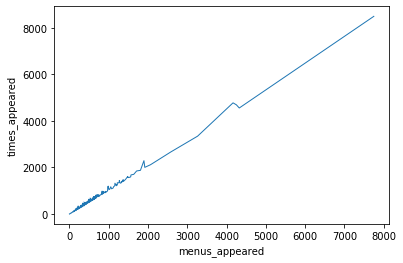

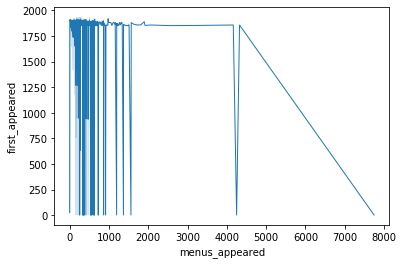

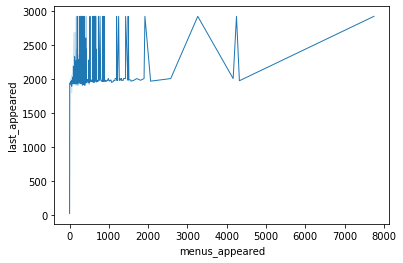

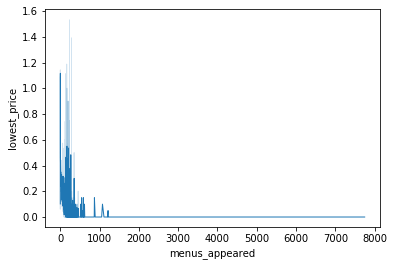

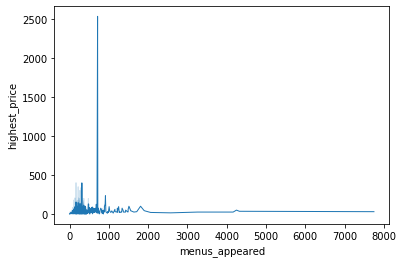

In [15]:
for i, col in enumerate(['times_appeared','first_appeared','last_appeared','lowest_price','highest_price']):
    plt.figure()
    sns.lineplot(y=col, x='menus_appeared', data=df_dish, lw=1)

- **Name**: (str) 1500 Chars - Name of Dish
- **Description**  : (str) 1500 Chars - Name of Dish - Always NULL `(Not Usable)`
- **MenusAppeared**: Integer          - Number of menus the dish appeared
- **TimesAppeared**: Integer          - Total Unique appearences
- **FirstAppeared**: Integer          - Menu ID of first appearance
- **lastAppeared** : Integer          - Menu ID of last appearance
- **lowestPrice**  : Decimal(2)       - Lowest listed price
- **highestprice** : Decimal(2)       - highest listed price

In [16]:
with open (DataDir+MenuFile, 'r', encoding='utf-8') as f:
    df_menu = pd.read_csv(f)
df_menu.head(5)

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,keywords,language,date,location,location_type,currency,currency_symbol,status,page_count,dish_count
0,12463,NaN,HOTEL EASTMAN,BREAKFAST,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,EASTER;,NaN,1900-2822,nan,nan,1900-04-15,Hotel Eastman,nan,NaN,NaN,complete,2,67
1,12464,NaN,REPUBLICAN HOUSE,[DINNER],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,EASTER;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,nan,nan,1900-04-15,Republican House,nan,NaN,NaN,complete,2,34
2,12465,NaN,NORDDEUTSCHER LLOYD BREMEN,FRUHSTUCK/BREAKFAST;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,nan,nan,1900-04-16,Norddeutscher Lloyd Bremen,nan,NaN,NaN,complete,2,84
3,12466,NaN,NORDDEUTSCHER LLOYD BREMEN,LUNCH;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,nan,nan,1900-04-16,Norddeutscher Lloyd Bremen,nan,NaN,NaN,complete,2,63
4,12467,NaN,NORDDEUTSCHER LLOYD BREMEN,DINNER;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,nan,nan,1900-04-16,Norddeutscher Lloyd Bremen,nan,NaN,NaN,complete,4,33


In [17]:
with open (DataDir+ItemFile, 'r', encoding='utf-8') as f:
    df_menu_item = pd.read_csv(f)
df_menu_item.head(5)

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
0,1,1389,0.40,nan,1.00,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.11,0.25
1,2,1389,0.60,nan,2.00,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.44,0.25
2,3,1389,0.40,nan,3.00,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.14,0.26
3,4,1389,0.50,nan,4.00,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.38,0.26
4,5,3079,0.50,1.00,5.00,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.11,0.31


In [18]:
with open (DataDir+PageFile, 'r', encoding='utf-8') as f:
    df_menu_page = pd.read_csv(f)
df_menu_page.head(5)

,id,menu_id,page_number,image_id,full_height,full_width,uuid
0,119,12460,1.00,1603595,7230.00,5428.00,510d47e4-2955-a3d9-e040-e00a18064a99
1,120,12460,2.00,1603596,5428.00,7230.00,510d47e4-2956-a3d9-e040-e00a18064a99
2,121,12460,3.00,1603597,7230.00,5428.00,510d47e4-2957-a3d9-e040-e00a18064a99
3,122,12460,4.00,1603598,7230.00,5428.00,510d47e4-2958-a3d9-e040-e00a18064a99
4,123,12461,1.00,1603591,7230.00,5428.00,510d47e4-2959-a3d9-e040-e00a18064a99


In [19]:
df_dish.describe()

,id,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
count,426985.00,0.00,426985.00,426985.00,426985.00,426985.00,397884.00,397884.00
mean,266583.91,nan,3.04,3.12,1661.43,1665.19,0.96,1.59
std,151626.11,nan,27.71,29.85,666.37,667.04,6.68,12.64
min,1.00,nan,0.00,-10.00,0.00,0.00,0.00,0.00
25%,133484.00,nan,1.00,1.00,1900.00,1900.00,0.00,0.00
50%,271665.00,nan,1.00,1.00,1914.00,1917.00,0.00,0.00
75%,400116.00,nan,1.00,1.00,1949.00,1955.00,0.40,0.55
max,519481.00,nan,7748.00,8496.00,2928.00,2928.00,1035.00,3050.00


In [20]:
df_menu.describe()

,id,keywords,language,location_type,page_count,dish_count
count,17545.00,0.00,0.00,0.00,17545.00,17545.00
mean,25325.95,nan,nan,nan,3.48,75.71
std,6431.55,nan,nan,nan,3.30,98.85
min,12463.00,nan,nan,nan,1.00,0.00
25%,20742.00,nan,nan,nan,2.00,20.00
50%,26165.00,nan,nan,nan,2.00,35.00
75%,30707.00,nan,nan,nan,4.00,93.00
max,35526.00,nan,nan,nan,74.00,4053.00


In [21]:
df_menu_item.describe()

,id,menu_page_id,price,high_price,dish_id,xpos,ypos
count,1334419.00,1334419.00,888269.00,91990.00,1334178.00,1334419.00,1334419.00
mean,699048.37,47614.06,12.84,8.09,158823.44,0.39,0.55
std,400644.06,22041.69,499.15,90.05,168475.99,0.22,0.22
min,1.00,130.00,0.00,0.00,1.00,0.00,0.00
25%,350890.00,32064.00,0.25,0.50,5108.00,0.18,0.37
50%,703592.00,53386.00,0.40,1.25,81436.50,0.38,0.57
75%,1047237.50,66828.00,1.00,3.00,334992.75,0.57,0.74
max,1388524.00,77425.00,180000.00,7800.00,519481.00,0.99,1.00


In [22]:
df_menu_page.describe()

,id,menu_id,page_number,full_height,full_width
count,66937.00,66937.00,65735.00,66608.00,66608.00
mean,42719.76,25653.58,3.76,3859.10,2778.59
std,21274.00,6158.83,4.91,1156.01,970.29
min,119.00,12460.00,1.00,616.00,558.00
25%,27108.00,21743.00,1.00,2988.00,2120.00
50%,43894.00,26202.00,2.00,3630.00,2527.00
75%,60696.00,30531.00,4.00,4617.25,3295.25
max,77431.00,35526.00,74.00,12044.00,9175.00


In [ ]:
#END